# Prática 5 Python
# João Pedro Moro Bolognini

Importando as bibliotecas

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.tsa.seasonal import seasonal_decompose

Carregando os dados

In [3]:
dados = pd.read_csv('AirPassengers.csv')
print(dados.shape)
dados.head()

(144, 2)


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Visualização do tipo dos dados dos atributos

In [4]:
print(dados.dtypes)

Month          object
#Passengers     int64
dtype: object


Conversão dos atributos que estão no formato string para formato de data: ANO-MÊS

In [5]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
dados = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'],
                   index_col = 'Month', date_parser = dateparse)
dados

C:\Users\jpgar\AppData\Local\Temp\ipykernel_1260\235159312.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  base = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'],


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Visualização do índice do dataframe (#Passengers)

In [6]:
dados.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

Criando a Série Temporal

In [7]:
ts = dados['#Passengers']
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

Visualização de registros específicos

In [17]:
# Por índice
print(f"Por índice: {ts[95]}")

# Por ano e mês
print(f"Por ano e mês:\n{ts['1953-08']}")

# Por data específica
print(f"Por data específica: {ts[datetime(1949,2,1)]}")

# Por intervalos
print(f"Por intervalos:\n{ts['1950-01-01':'1950-10-14']}")

# Por intervalos a partir do ínicio
print(f"Por intervalos a partir do início:\n{ts[:'1950-10-14']}")

# Por ano
print(f"Por ano:\n{ts['1950']}")

# Período com maior valor
print(f"Período com maior valor: {ts.index.max()}")

# Período com menor valor
print(f"Período com menor valor: {ts.index.min()}")

Por índice: 306
Por ano e mês:
Month
1953-08-01    272
Name: #Passengers, dtype: int64
Por data específica: 118
Por intervalos:
Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
Name: #Passengers, dtype: int64
Por intervalos a partir do início:
Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
Name: #Passengers, dtype: int64
Por ano:
Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-

Visualizando a Série Temporal completa

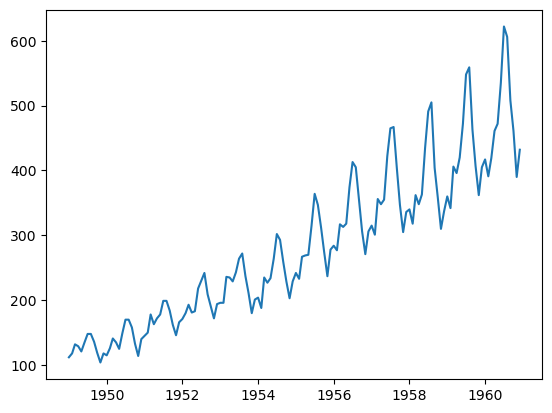

In [18]:
plt.plot(ts)

Visualização por ano

Month
1949-12-31    1520
1950-12-31    1676
1951-12-31    2042
1952-12-31    2364
1953-12-31    2700
1954-12-31    2867
1955-12-31    3408
1956-12-31    3939
1957-12-31    4421
1958-12-31    4572
1959-12-31    5140
1960-12-31    5714
Freq: A-DEC, Name: #Passengers, dtype: int64

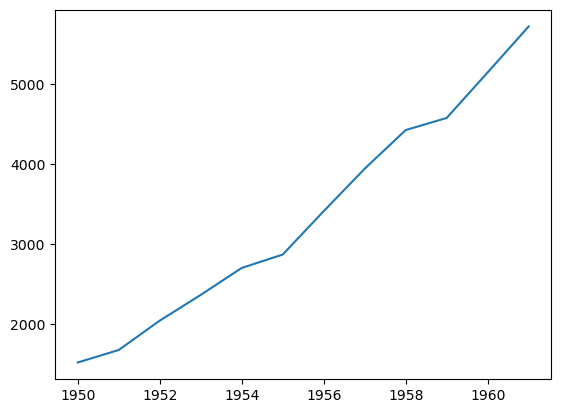

In [19]:
ts_ano = ts.resample('A').sum()
plt.plot(ts_ano)
ts_ano

Visualização por mês

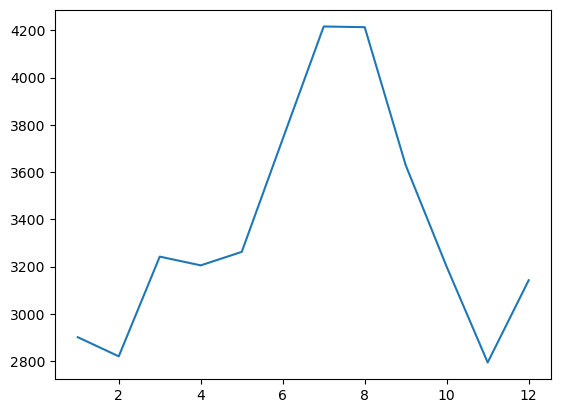

In [20]:
ts_mes = ts.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes)

Visualização em datas específicas

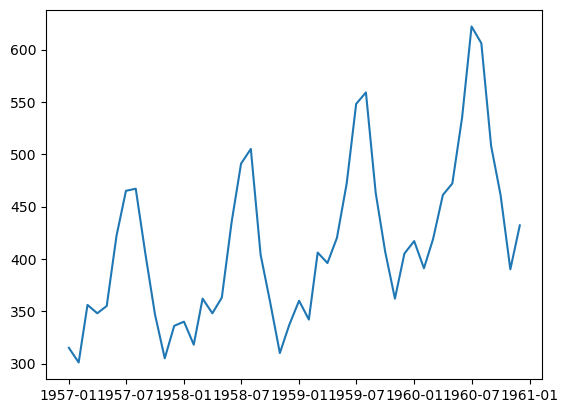

In [21]:
ts_datas = ts['1957-01-01':'1960-12-01']
plt.plot(ts_datas)

Vamos agora fazer a decomposição da série temporal. Iniciando a conversão do atributo para data e criando a série temporal

In [22]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
dados = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'],
                   index_col = 'Month', date_parser = dateparse)
ts = dados['#Passengers']

C:\Users\jpgar\AppData\Local\Temp\ipykernel_1260\2083272952.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  dados = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'],


Visualização da Série Temporal

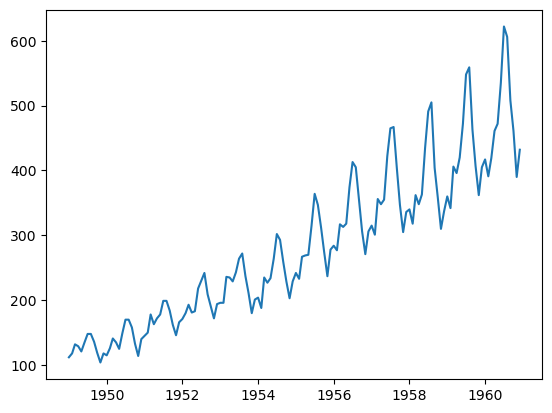

In [23]:
plt.plot(ts)

Decompondo a Série Temporal, criando uma variável para cada formato

In [26]:
decomposicao = seasonal_decompose(ts)

Observação da tendência

In [27]:
tendencia = decomposicao.trend
tendencia

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

Verificando a sazonalidade

In [28]:
sazonal = decomposicao.seasonal
sazonal

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

Verificando o erro

In [29]:
aleatorio = decomposicao.resid
aleatorio

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

Visualizando o gráfico para cada formato da Série Temporal

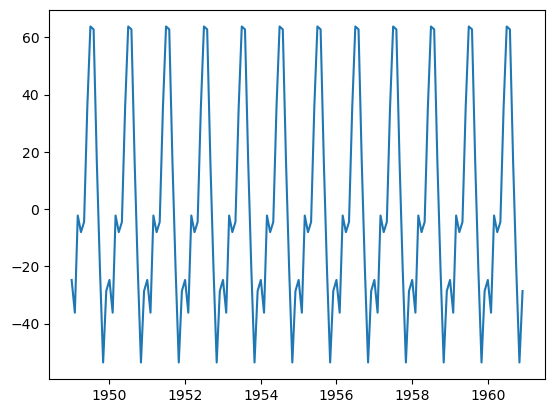

In [30]:
plt.plot(sazonal)

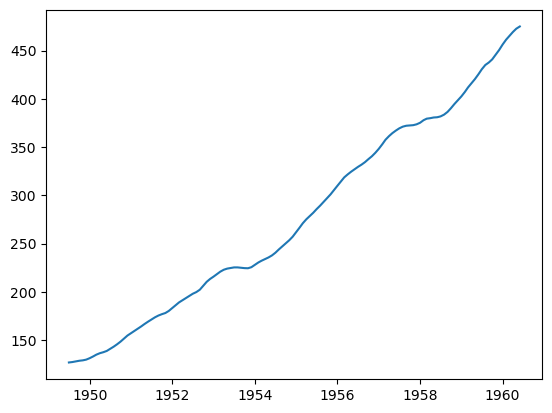

In [31]:
plt.plot(tendencia)

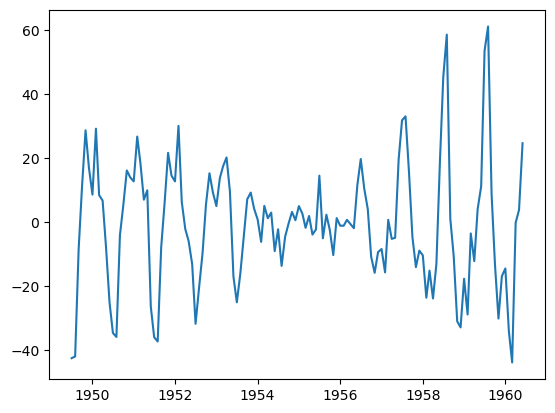

In [32]:
plt.plot(aleatorio)

Juntando todos os gráficos

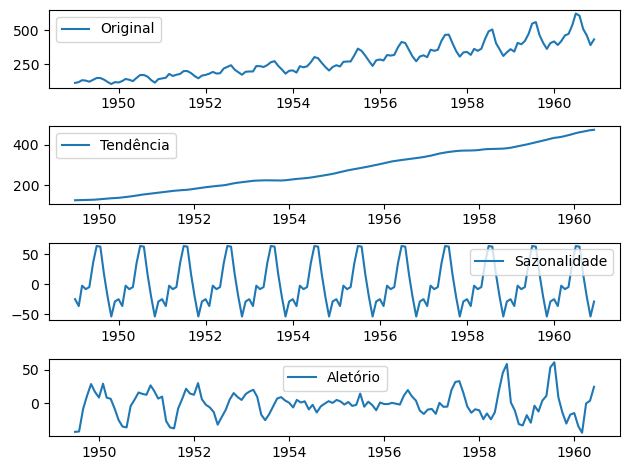

In [33]:
plt.subplot(4,1,1)
plt.plot(ts, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(4,1,2)
plt.plot(tendencia, label = 'Tendência')
plt.legend(loc = 'best')

plt.subplot(4,1,3)
plt.plot(sazonal, label = 'Sazonalidade')
plt.legend(loc = 'best')

plt.subplot(4,1,4)
plt.plot(aleatorio, label = 'Aletório')
plt.legend(loc = 'best')
plt.tight_layout()